<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

## Problema 1: Ejecución de varios métodos

In [ ]:
'''Trains an LSTM model on the IMDB sentiment classification task.

The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.

# Notes

- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.

- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras import backend as K

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...


/home/omar/workspace/miniconda3/envs/tf115/lib/python3.7/site-packages/keras/datasets/imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/omar/workspace/miniconda3/envs/tf115/lib/python3.7/site-packages/keras/datasets/imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 21s 849us/step - loss: 0.4611 - accuracy: 0.7809 - val_loss: 0.3855 - val_accuracy: 0.8323
Epoch 2/15
25000/25000 [==============================] - 21s 836us/step - loss: 0.3021 - accuracy: 0.8755 - val_loss: 0.3678 - val_accuracy: 0.8390
Epoch 3/15
25000/25000 [==============================] - 21s 840us/step - loss: 0.2182 - accuracy: 0.9146 - val_loss: 0.4089 - val_accuracy: 0.8233
Epoch 4/15
25000/25000 [==============================] - 21s 839us/step - loss: 0.1573 - accuracy: 0.9405 - val_loss: 0.4878 - val_accuracy: 0.8256
Epoch 5/15
25000/25000 [==============================] - 21s 837us/step - loss: 0.1163 - accuracy: 0.9586 - val_loss: 0.5200 - val_accuracy: 0.8258
Epoch 6/15
25000/25000 [==============================

/home/omar/workspace/miniconda3/envs/tf115/lib/python3.7/site-packages/ipykernel_launcher.py:55: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/omar/workspace/miniconda3/envs/tf115/lib/python3.7/site-packages/ipykernel_launcher.py:57: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Train on 950 samples, validate on 50 samples
Epoch 1/15
950/950 [==============================] - 41s 43ms/step - loss: 0.2735 - val_loss: 1.0340
Epoch 2/15
950/950 [==============================] - 39s 41ms/step - loss: 0.0336 - val_loss: 1.1823
Epoch 3/15
950/950 [==============================] - 39s 42ms/step - loss: 0.0067 - val_loss: 0.8170
Epoch 4/15
950/950 [==============================] - 40s 42ms/step - loss: 0.0018 - val_loss: 0.3894
Epoch 5/15
950/950 [==============================] - 39s 42ms/step - loss: 9.0499e-04 - val_loss: 0.2013
Epoch 6/15
950/950 [==============================] - 39s 41ms/step - loss: 6.3143e-04 - val_loss: 0.0144
Epoch 7/15
950/950 [==============================] - 40s 42ms/step - loss: 5.1775e-04 - val_loss: 0.0018
Epoch 8/15
950/950 [==============================] - 40s 42ms/step - loss: 4.1327e-04 - val_loss: 7.4964e-04
Epoch 9/15
950/950 [==============================] - 40s 42ms/step - loss: 3.7407e-04 - val_loss: 5.8123e-04
Epoch 10/

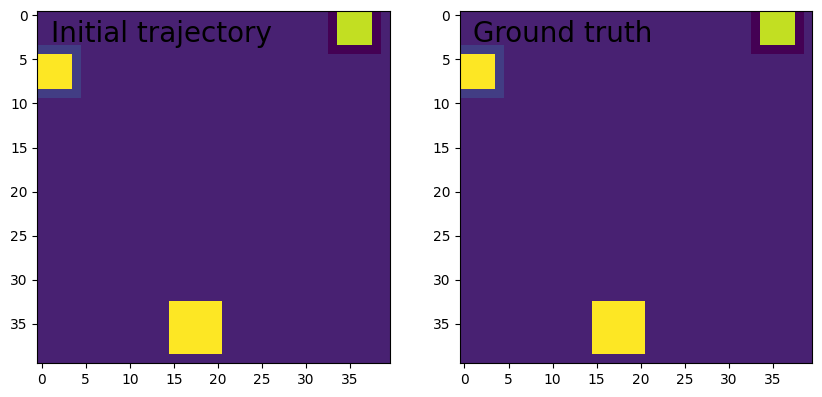

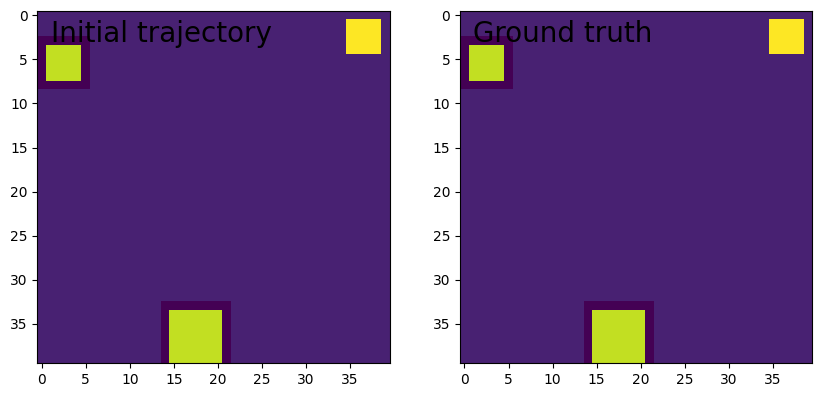

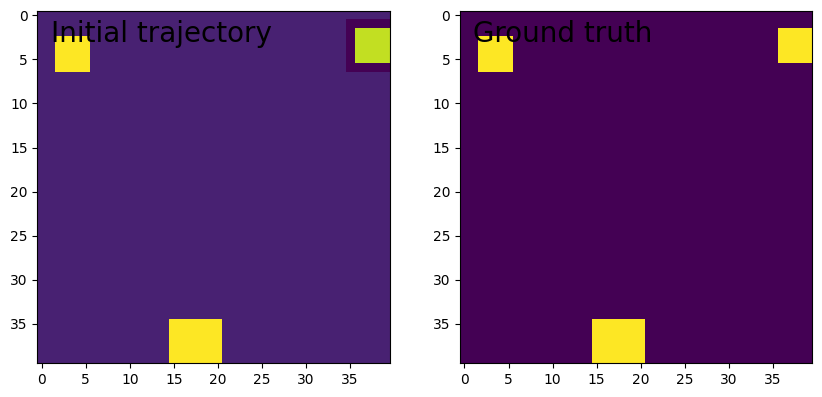

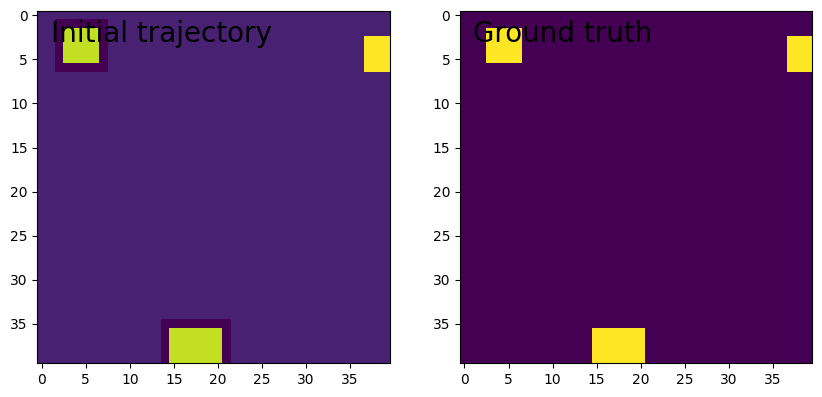

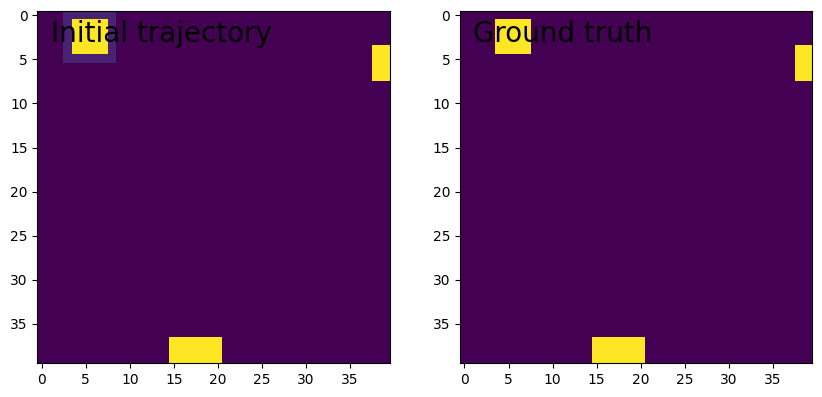

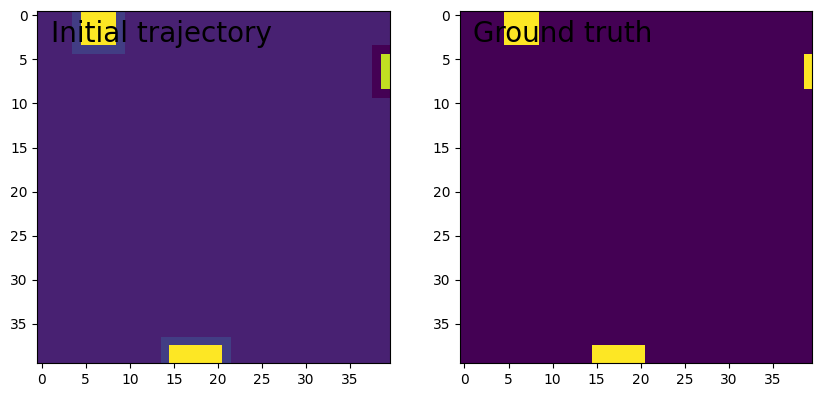

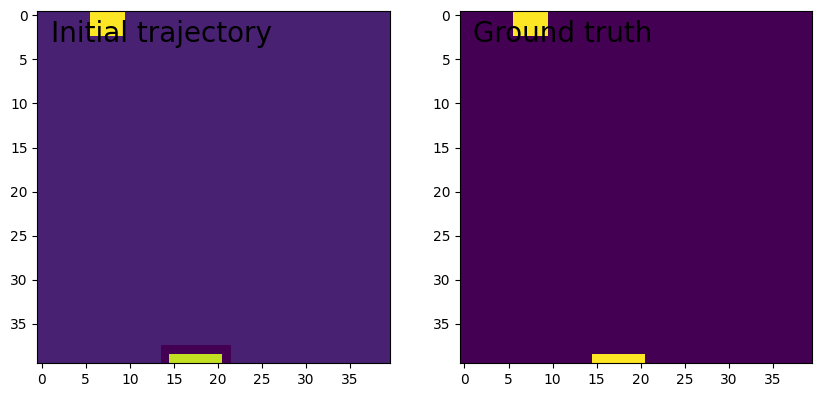

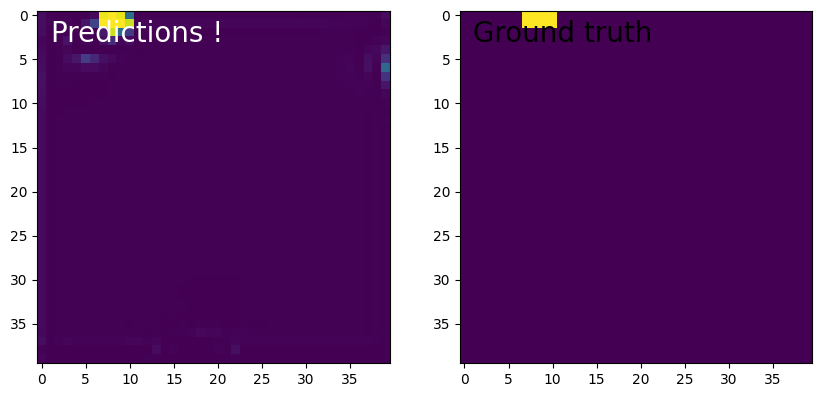

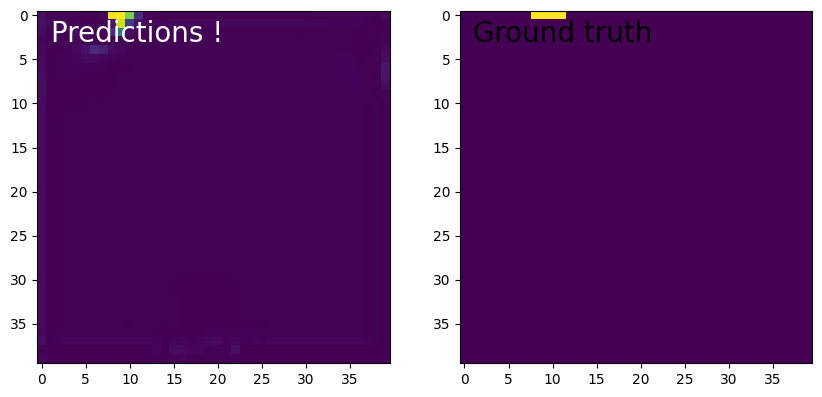

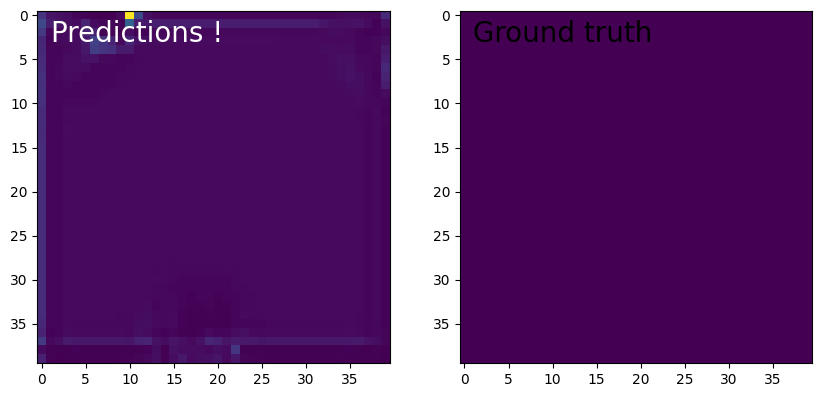

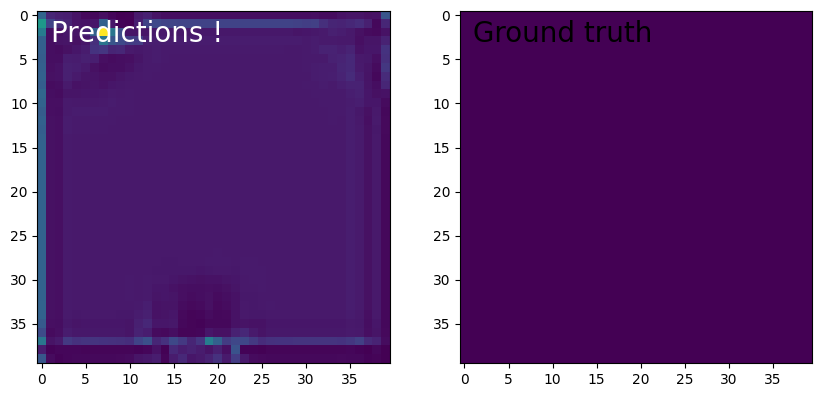

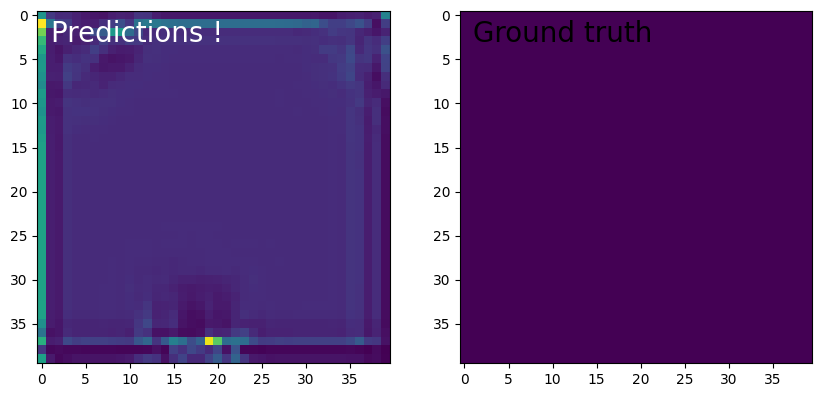

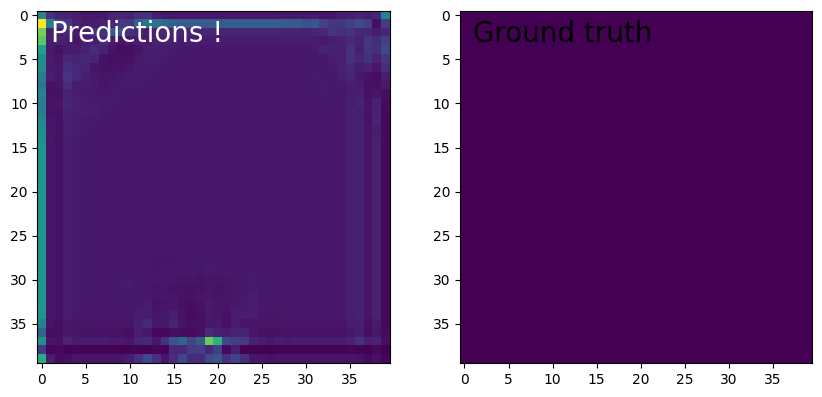

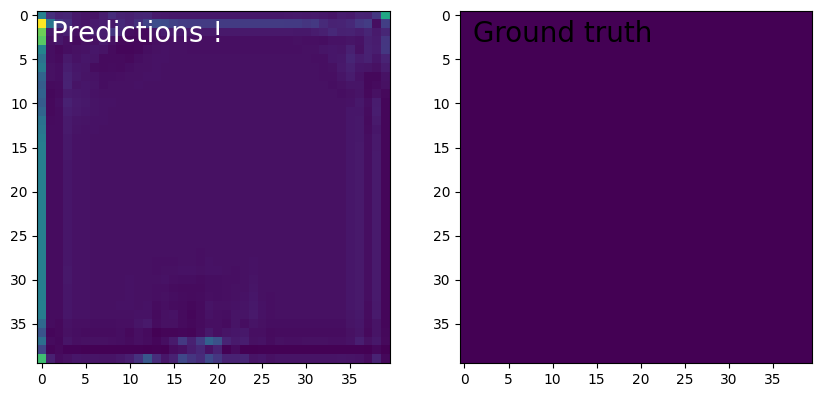

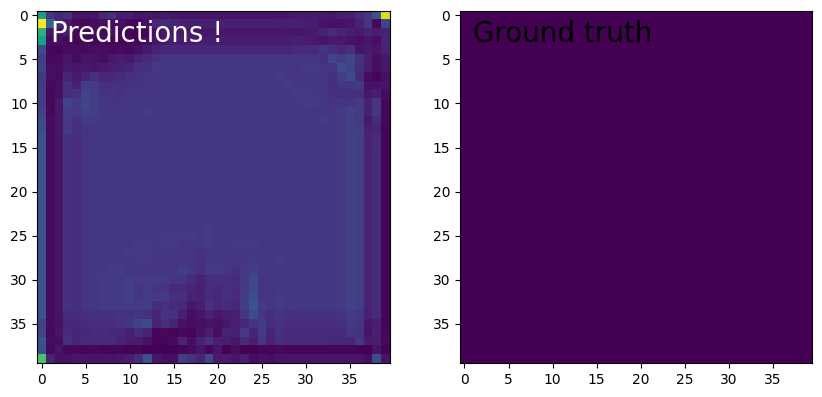

In [ ]:
""" This script demonstrates the use of a convolutional LSTM network.

This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt
from keras import backend as K

if K.backend() == 'mxnet':
    raise NotImplementedError("MXNet Backend: ConvLSTM2D Layer is not supported yet.")

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=15, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

## Problema 2: Comparación entre otros conjuntos de datos

In [ ]:
from tensorflow.keras.utils import to_categorical

from keras.datasets import reuters
(x_train, y_train), (x_test, y_test) = reuters.load_data(
    path="reuters.npz",
    num_words=None,
    skip_top=0,
    maxlen=None,
    test_split=0.2,
    seed=113,
    start_char=1,
    oov_char=2,
    index_from=3,
)

num_classes = 46
max_features = 5000

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model3 = Sequential()

model3.add(Embedding(max_features, 128))
model3.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model3.add(Dense(46, activation='softmax'))

# try using different optimizers and different optimizer configs
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1)
score, acc = model3.evaluate(x_test, y_test,
                            batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

/home/omar/workspace/miniconda3/envs/tf115/lib/python3.7/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/omar/workspace/miniconda3/envs/tf115/lib/python3.7/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Train on 8083 samples, validate on 899 samples
Epoch 1/10
8083/8083 [==============================] - 28s 4ms/sample - loss: 2.2714 - acc: 0.4209 - val_loss: 1.8565 - val_acc: 0.5295
Epoch 2/10
8083/8083 [==============================] - 28s 3ms/sample - loss: 1.7862 - acc: 0.5286 - val_loss: 1.7355 - val_acc: 0.5628
Epoch 3/10
8083/8083 [==============================] - 28s 3ms/sample - loss: 1.5905 - acc: 0.5878 - val_loss: 1.6674 - val_acc: 0.5862
Epoch 4/10
8083/8083 [==============================] - 28s 3ms/sample - loss: 1.4738 - acc: 0.6181 - val_loss: 1.5551 - val_acc: 0.6118
Epoch 5/10
8083/8083 [==============================] - 29s 4ms/sample - loss: 1.3229 - acc: 0.6598 - val_loss: 1.4906 - val_acc: 0.6340
Epoch 6/10
8083/8083 [==============================] - 30s 4ms/sample - loss: 1.1720 - acc: 0.6938 - val_loss: 1.3691 - val_acc: 0.6652
Epoch 7/10
8083/8083 [==============================] - 30s 4ms/sample - loss: 1.0378 - acc: 0.7304 - val_loss: 1.3448 - val_acc: 0

## Problema 3: Explicación de otras clases

**1. RNN**  
Es una capa contenedora general para una o más celdas recurrentes.  
se puede usar directamente SimpleRNN, LSTM o GRU como capas listas para usar.  
Pero si se quiere más control sobre cómo se ejecutan las operaciones recurrentes, se puede utilizar RNN junto con *Cells.  
permite definir redes recurrentes personalizadas, por ejemplo combinando celdas de diferentes tipos o usando funciones de activación o regularización distintas.  

**2. SimpleRNNCell**  
Representa una unidad mínima de RNN básica (una sola celda recurrente).  
Solo mantiene el estado oculto h (no hay "estado de celda" como en LSTM).  
Tiene problemas con secuencias largas debido al desvanecimiento del gradiente.  

**3. GRUCell**  
Es una celda de Unidad Recurrente Gated (GRU). Más avanzada que SimpleRNN.  
Utiliza puertas para controlar el flujo de información:  
Puerta de actualización (update gate): decide cuánto del estado anterior conservar.  
Puerta de reinicio (reset gate): decide cuánta información del pasado olvidar.  
Más eficiente que LSTM: tiene menos parámetros y una sola representación de estado (h_t).  
Maneja mejor el problema del gradiente desvanecido que SimpleRNN.  

**4. LSTMCell**  
Es una celda Long Short-Term Memory (LSTM).  
Diseñada para recordar información por períodos largos.  
Utiliza dos estados:  
Estado de celda c_t: almacena memoria a largo plazo.  
Estado oculto h_t: salida actual.  
Usa 3 puertas:  
Olvido (forget gate): decide qué descartar del estado de celda.  
Entrada (input gate): decide qué nueva info almacenar.  
Salida (output gate): decide qué parte del estado devolver como salida.  

**5. StackedRNNCells**  
Es una composición de varias celdas para crear redes recurrentes profundas.  
Te permite apilar varias celdas (por ejemplo, 3 LSTMCell seguidas) en una sola capa RNN.  
Internamente, el output de una celda es la entrada de la siguiente, en cada paso de tiempo.  

**6. CuDNNGRU (obsoleta desde TensorFlow 2.0)**
Era una implementación especial de GRU optimizada para GPU (usando CuDNN).  
Mucho más rápida en GPU (como una versión "turbo" de GRU).  
No funcionaba en CPU.  
Ahora ya no se necesita porque Keras usa automáticamente CuDNN si hay GPU.  